In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [36]:
image = load_img('images/nispakh/id_clear_nispakh.jpeg')
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


In [37]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
total = 0

In [38]:
imageGen = aug.flow(image, batch_size=1, save_to_dir='images/nispakh', save_prefix="image", save_format="jpg")

In [39]:
import tqdm
for image in imageGen:
# increment our counter
    total += 1

    # if we have reached the specified number of examples, break
    # from the loop
    if total == 2500:
        break

KeyboardInterrupt: 

In [ ]:
def dec(doll):
    if doll == 1:
        print('last doll')
    else:
        print(doll)
        doll = dec(doll - 1)
        

In [ ]:
def fact(n):
    if n == 0 or n==1:
        return 1
    else:
        f = n * fact(n-1)
    return f

In [ ]:
fact(5)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
image = cv2.imread('id_clear.jpeg')

In [18]:
def display(img):
    plt.figure(figsize=(15,10))
    plt.imshow(img)

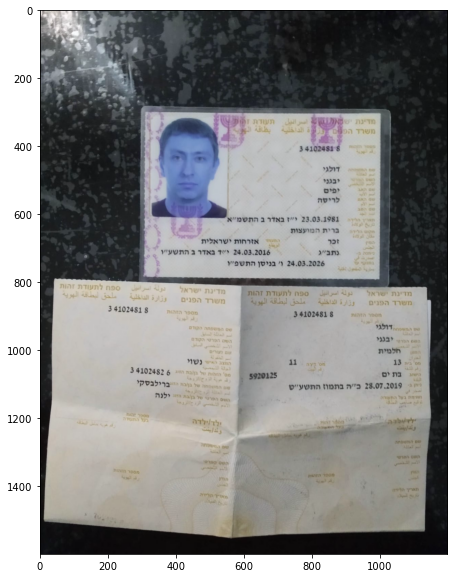

In [19]:
display(image)

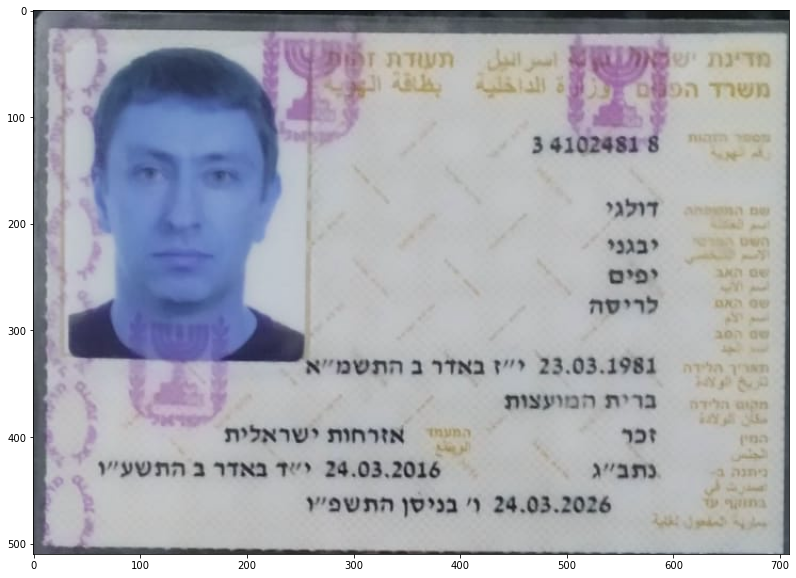

In [20]:
id2 = image[282 : 282+510, 295: 295+709]
display(id2)

In [21]:
cv2.imwrite('id2.png',id2)

True

In [14]:
detector = cv2.ORB_create()

In [17]:
kp1, desc1 = detector.detectAndCompute(id2, None)
kp2, desc2 = detector.detectAndCompute(image, None)

In [18]:
brute_force_match = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [19]:
matches = brute_force_match.match(desc1, desc2)

In [20]:
matches = sorted(matches, key=lambda x: x.distance)

In [21]:
id_matches = cv2.drawMatches(id2, kp1, image,kp2, matches[:25], None, flags=2)

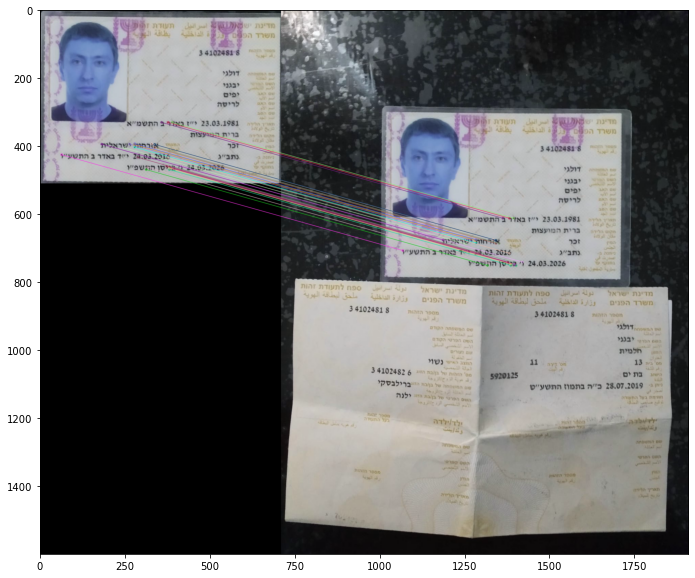

In [22]:
display(id_matches)

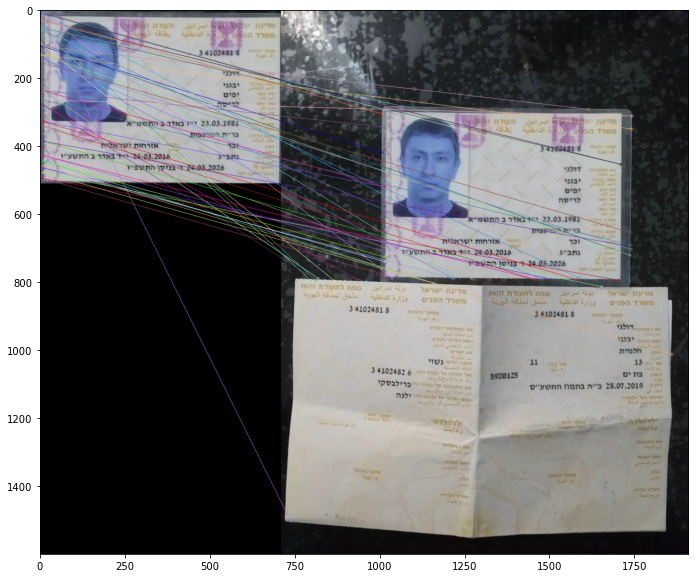

In [24]:
detector = cv2.ORB_create()
sift = cv2.SIFT_create()

kp1, desc1 = sift.detectAndCompute(id2, None)
kp2, desc2 = sift.detectAndCompute(image, None)

brute_force_match = cv2.BFMatcher()
matches = brute_force_match.knnMatch(desc1, desc2, k=2)

good = []

for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        
id_matches = cv2.drawMatchesKnn(id2, kp1, image,kp2, matches[:25], None, flags=2)
         
    
display(id_matches)

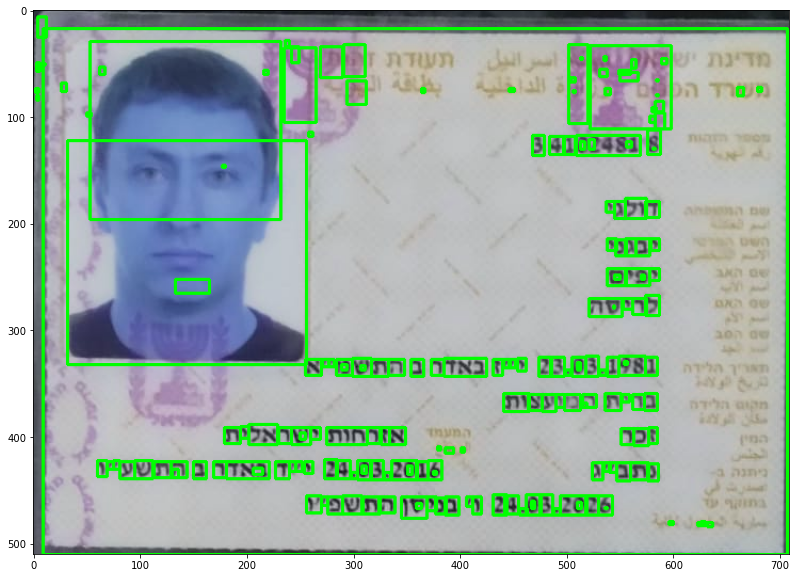

In [37]:
img = id2.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,3)

thresh = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# kernel = np.ones((5,5), np.uint8)
# thresh = cv2.dilate(thresh,kernel,iterations = 3)
# thresh = cv2.erode(thresh,None,iterations = 2)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#     cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)
display(img)

In [13]:
import shutil
import os

In [14]:
# Каталог с набором данных
data_dir = '/home/andrey/work/datasets/cats_dogs/train'
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Часть набора данных для тестирования
test_data_portion = 0.15
# Часть набора данных для проверки
val_data_portion = 0.15
# Количество элементов данных в одном классе
nb_images = 2501

In [ ]:
def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "cats"))
    os.makedirs(os.path.join(dir_name, "dogs"))

In [ ]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

In [ ]:
def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "cat." + str(i) + ".jpg"), 
                    os.path.join(dest_dir, "cats"))
        shutil.copy2(os.path.join(source_dir, "dog." + str(i) + ".jpg"), 
                   os.path.join(dest_dir, "dogs"))

In [ ]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print(start_val_data_idx)
print(start_test_data_idx)   

In [ ]:
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

In [33]:
import os
import shutil
# assign directory
resut = 'results'
aug = 'augmented'
result_images = 'result_images'

# imgs = [filename[:-4] for filename in os.listdir(aug)]


for filename in os.listdir(resut):
    if filename[:-4] in imgs:
        shutil.copy2(f'{aug}/{filename[:-4]}.jpg', f'{result_images}/{filename[:-4]}.jpg')
        
#     f = os.path.join(directory, filename)
#     # checking if it is a file
#     if os.path.isfile(f):
#         print(filename[:-4])

In [30]:
imgs

['image_0_1',
 'image_0_1005',
 'image_0_1014',
 'image_0_1036',
 'image_0_1051',
 'image_0_106',
 'image_0_1061',
 'image_0_1063',
 'image_0_107',
 'image_0_1070',
 'image_0_1072',
 'image_0_108',
 'image_0_1091',
 'image_0_1094',
 'image_0_1097',
 'image_0_1098',
 'image_0_1104',
 'image_0_1105',
 'image_0_1112',
 'image_0_1117',
 'image_0_1138',
 'image_0_1160',
 'image_0_1161',
 'image_0_1171',
 'image_0_1182',
 'image_0_1184',
 'image_0_1190',
 'image_0_1196',
 'image_0_1199',
 'image_0_1208',
 'image_0_1209',
 'image_0_1212',
 'image_0_1223',
 'image_0_1224',
 'image_0_1225',
 'image_0_1229',
 'image_0_1232',
 'image_0_1239',
 'image_0_1257',
 'image_0_1275',
 'image_0_1282',
 'image_0_1341',
 'image_0_1342',
 'image_0_1346',
 'image_0_1352',
 'image_0_136',
 'image_0_1366',
 'image_0_1389',
 'image_0_1403',
 'image_0_1429',
 'image_0_1440',
 'image_0_1446',
 'image_0_1464',
 'image_0_1467',
 'image_0_1470',
 'image_0_1473',
 'image_0_148',
 'image_0_1482',
 'image_0_1483',
 'ima

In [24]:
s = 'some.str'

In [27]:
print(s[:-4])

some


In [38]:
def first_method():
    second_method()
    print("I'm the first method")

def second_method():
    third_method()
    print("I'm the second method")
    
def third_method():
    forth_method()
    print("I'm the third method")
    
def forth_method():
    print("I'm the froth method")

In [40]:
first_method()

I'm the froth method
I'm the third method
I'm the second method
I'm the first method


In [3]:
def recursionMethod(n):
    if n < 1:
        print("n< 1")
    else:
        print(n)    
        recursionMethod(n-1)

In [4]:
recursionMethod(5)

5
4
3
2
1
n< 1


In [16]:
def fact(n):
    assert n>=0 and int(n) == n, 'The number has to be positive integer'
    
    if n in [0,1]:
        return 1
    else:
#         n = n * fact(n-1)
        return n * fact(n-1)

In [17]:
fact(5)

120

In [7]:
def fact_w(n):
    assert n>=0 and int(n) == n, 'The number has to be positive integer'
    i = n
    if n in [0,1]:
        return n
    else:
        while i > 1:
            n = n * (i-1)
            i -= 1
            
    print(n)
            
            
         

In [8]:
fact_w(5)

120


In [11]:
def fib(n):
    assert n>=0 and int(n) ==n, 'The number has to be positive integer'
    
    if n in [0,1]:
        return n
    else:
        n = fib(n-1) + fib(n-2)
    return n
    
      

In [18]:
def fib(n):
    res=1
    for i in range(1, n+1):
        res *=i
 
    return res

In [ ]:
def sum_of_positive(n):
        
    assert n >=0, int(n)==n
    n 
    

In [31]:
n = 105
s = 0
while n:
    r = n%10
    n = n//10
    s +=r
print(s)
    
    

6


In [6]:
def rec_sum(n):
    assert n >= 0 and int(n) == n, "The number has to be positive integer"
    
    if n == 0:
        return 0
    else:
        n = int(n%10) + rec_sum(int(n/10))
    return n

In [7]:
rec_sum(105)

6